In [1575]:
#import packages
from statsbombpy import sb
import pandas as pd


In [1576]:
competitions_and_seasons = [
(11, 27, "2015/16 La Liga"),
(9, 27, "2015/16 Bundesliga"),
(2, 27, "2015/16 Premier League"),
(12, 27, "2015/16 Serie A"),
(7, 27, "2015/16 Ligue 1"),
(43, 106, "FIFA World Cup 22"),
(43, 3, "FIFA World Cup 18"),
(55, 282, "Euro 2024"),
(55, 43, "Euro 2020")  
]


önce bir lig için oyuncuların şu istatistiklerini toparla:
- pas sayısı
- pas başarı yüzdesi
- pasın kale doğrultusundaki mesafesi
- gole yol açan pas oranı
- şuta yol açan pas oranı
- 3.alana atılan pas miktarı
- pastan sonra oluşan şutun xgsi
- ceza sahasına atılan paslar

sonra bunu bütün ligler için yap ve de tableu atıp görseleştir

### **Match Data**

In [1577]:
#laliga for döngüsü ile hepsini alıcaz
matches = sb.matches(competition_id=11, season_id=27)
matches.head(5)


/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3825848,2015-09-23,20:00:00.000,Spain - La Liga,2015/2016,Levante UD,Eibar,2,2,available,...,None,5,Regular Season,Estadio Ciudad de Valencia,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria,1.1.0,2,2
1,3825895,2015-09-23,22:00:00.000,Spain - La Liga,2015/2016,Las Palmas,Sevilla,2,0,available,...,None,5,Regular Season,Estadio de Gran Canaria,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien,1.1.0,2,2
2,3825894,2016-05-01,18:15:00.000,Spain - La Liga,2015/2016,RC Deportivo La Coruña,Getafe,0,2,available,...,None,36,Regular Season,Estadio Abanca-Riazor,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén,1.1.0,2,2
3,3825855,2016-05-02,20:30:00.000,Spain - La Liga,2015/2016,Málaga,Levante UD,3,1,available,...,None,36,Regular Season,Estadio La Rosaleda,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia,1.1.0,2,2
4,3825908,2016-05-15,19:00:00.000,Spain - La Liga,2015/2016,Espanyol,Eibar,4,2,available,...,None,38,Regular Season,RCDE Stadium,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria,1.1.0,2,2


In [1578]:
events_extra_info = matches[[
    "match_id",
    "match_date",
    "kick_off",
    "competition",
    "home_team",
    "away_team",
    "home_score",
    "away_score",
    "match_status",
    "match_week",
    "competition_stage",
    "referee",
    "home_managers",
    "away_managers",
]]
events_extra_info

,match_id,match_date,kick_off,competition,home_team,away_team,home_score,away_score,match_status,match_week,competition_stage,referee,home_managers,away_managers
0,3825848,2015-09-23,20:00:00.000,Spain - La Liga,Levante UD,Eibar,2,2,available,5,Regular Season,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria
1,3825895,2015-09-23,22:00:00.000,Spain - La Liga,Las Palmas,Sevilla,2,0,available,5,Regular Season,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien
2,3825894,2016-05-01,18:15:00.000,Spain - La Liga,RC Deportivo La Coruña,Getafe,0,2,available,36,Regular Season,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén
3,3825855,2016-05-02,20:30:00.000,Spain - La Liga,Málaga,Levante UD,3,1,available,36,Regular Season,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia
4,3825908,2016-05-15,19:00:00.000,Spain - La Liga,Espanyol,Eibar,4,2,available,38,Regular Season,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,266467,2015-09-23,20:00:00.000,Spain - La Liga,Celta Vigo,Barcelona,4,1,available,5,Regular Season,Alberto Undiano Mallenco,Manuel Eduardo Berizzo,Luis Enrique Martínez García
376,267273,2016-02-20,17:00:00.000,Spain - La Liga,Las Palmas,Barcelona,1,2,available,25,Regular Season,NaN,Enrique Setién Solar,Luis Enrique Martínez García
377,266490,2015-09-20,20:30:00.000,Spain - La Liga,Barcelona,Levante UD,4,1,available,4,Regular Season,David Fernández Borbalan,Luis Enrique Martínez García,Luis Lucas Alcaraz González
378,266254,2016-02-14,21:30:00.000,Spain - La Liga,Barcelona,Celta Vigo,6,1,available,24,Regular Season,NaN,Luis Enrique Martínez García,Manuel Eduardo Berizzo


In [1579]:
events_df = sb.events(match_id=3825882)
events_df.columns

/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_height', 'pass_inswinging', 'pass_length'

In [1580]:
events_df = events_df.set_index("match_id").join(events_extra_info.set_index("match_id"),how="left", rsuffix='_match').reset_index()
events_df

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,home_team,away_team,home_score,away_score,match_status,match_week,competition_stage,referee,home_managers,away_managers
0,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
3,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
4,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
3812,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
3813,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
3814,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo


In [1581]:
for i in events_df.columns:
    print(i)

match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
id
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
position
possession
possession_team
p

In [1582]:
events_df.set_index("id")

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,home_team,away_team,home_score,away_score,match_status,match_week,competition_stage,referee,home_managers,away_managers
id,,,,,,,,,,,,,,,,,,,,,
3cb51b37-68a3-4a84-979a-ba33893415cc,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
caa5e06b-ad86-43fd-b4d1-dc072903ca9f,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
108ca3d0-05b0-4b1d-8b5c-7fb65e6ab5a1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
c5ee5580-8472-4df6-a03c-915d68dd0d63,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
71f3cb33-ebd0-45f8-b5a7-138d33792dbc,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a62fd598-e030-42d8-a8ea-0a7684b687e3,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
8a519515-400c-4e22-990a-53813d64a61d,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo
35f30b1a-b5c4-4f7a-9dd6-ba364c052a06,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,Celta Vigo,2,0,available,38,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo


### **Posession Data**

In [1583]:
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')



In [1584]:
#events_df = events_df[events_df['timestamp']!="00:00:00.000"]
events_df.loc[events_df['minute'] >= 45, 'timestamp'] += pd.Timedelta(minutes=45)

#events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')
test = events_df[["duration","kick_off","minute","timestamp","possession","possession_team"]].sort_values("timestamp")
#test = test[test["possession"]==103]
test

,duration,kick_off,minute,timestamp,possession,possession_team
0,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
1,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
2,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
3,0.000000,19:30:00.000,0,1900-01-01 00:00:00.000,1,Atlético Madrid
6,0.074312,19:30:00.000,0,1900-01-01 00:00:00.635,2,Atlético Madrid
...,...,...,...,...,...,...
3689,0.000000,19:30:00.000,92,1900-01-01 01:32:54.015,206,Atlético Madrid
3707,0.163976,19:30:00.000,92,1900-01-01 01:32:58.275,206,Atlético Madrid
3727,0.000000,19:30:00.000,92,1900-01-01 01:32:58.439,206,Atlético Madrid
3796,0.000000,19:30:00.000,93,1900-01-01 01:33:08.385,206,Atlético Madrid


In [1585]:

possession_time = test.groupby("possession").apply(
    lambda x: (x["timestamp"].max() - x["timestamp"].min()).total_seconds()
).reset_index(name="possession_time")

possession_time

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_24408/2618002347.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  possession_time = test.groupby("possession").apply(


,possession,possession_time
0,1,0.000
1,2,18.672
2,3,6.338
3,4,14.437
4,5,4.427
...,...,...
201,202,45.847
202,203,11.724
203,204,1.341
204,205,22.148


In [1586]:
events_df = events_df.set_index("possession").join(possession_time.set_index("possession"),how="left").reset_index()
events_df[events_df["possession"]==2][["duration","kick_off","minute","timestamp","player","team","type","possession","possession_team","possession_time"]].sort_values("timestamp")

,duration,kick_off,minute,timestamp,player,team,type,possession,possession_team,possession_time
6,0.074312,19:30:00.000,0,1900-01-01 00:00:00.635,Antoine Griezmann,Atlético Madrid,Pass,2,Atlético Madrid,18.672
2045,0.506245,19:30:00.000,0,1900-01-01 00:00:00.710,Fernando José Torres Sanz,Atlético Madrid,Carry,2,Atlético Madrid,18.672
1091,NaN,19:30:00.000,0,1900-01-01 00:00:00.710,Fernando José Torres Sanz,Atlético Madrid,Ball Receipt*,2,Atlético Madrid,18.672
7,1.174349,19:30:00.000,0,1900-01-01 00:00:01.216,Fernando José Torres Sanz,Atlético Madrid,Pass,2,Atlético Madrid,18.672
1092,NaN,19:30:00.000,0,1900-01-01 00:00:02.390,Augusto Matías Fernández,Atlético Madrid,Ball Receipt*,2,Atlético Madrid,18.672
2046,1.573045,19:30:00.000,0,1900-01-01 00:00:02.390,Augusto Matías Fernández,Atlético Madrid,Carry,2,Atlético Madrid,18.672
2934,0.428050,19:30:00.000,0,1900-01-01 00:00:03.403,John Guidetti,Celta Vigo,Pressure,2,Atlético Madrid,18.672
8,2.694597,19:30:00.000,0,1900-01-01 00:00:03.963,Augusto Matías Fernández,Atlético Madrid,Pass,2,Atlético Madrid,18.672
1093,NaN,19:30:00.000,0,1900-01-01 00:00:06.658,Saúl Ñíguez Esclapez,Atlético Madrid,Ball Receipt*,2,Atlético Madrid,18.672
9,1.373944,19:30:00.000,0,1900-01-01 00:00:06.698,Saúl Ñíguez Esclapez,Atlético Madrid,Pass,2,Atlético Madrid,18.672


### **Player Data**

In [1587]:
players = (
    events_df[events_df["player"].notnull()][["player", "position", "team"]]
    .groupby("player")["position"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

players

,player,position
0,Antoine Griezmann,Left Center Forward
1,Augusto Matías Fernández,Left Defensive Midfield
2,Carles Planas Antolínez,Left Back
3,Daniel Wass,Right Defensive Midfield
4,Diego Roberto Godín Leal,Left Center Back
5,Fabián Ariel Orellana Valenzuela,Right Wing
6,Fernando José Torres Sanz,Right Center Forward
7,Filipe Luís Kasmirski,Left Back
8,Gabriel Fernández Arenas,Right Defensive Midfield
9,Hugo Mallo Novegil,Right Center Back


In [1588]:
# Data as a list of dictionaries
positions = [
    {"Position Number": 1, "Position Abbreviation": "GK", "Position Name": "Goalkeeper"},
    {"Position Number": 2, "Position Abbreviation": "RB", "Position Name": "Right Back"},
    {"Position Number": 3, "Position Abbreviation": "RCB", "Position Name": "Right Center Back"},
    {"Position Number": 4, "Position Abbreviation": "CB", "Position Name": "Center Back"},
    {"Position Number": 5, "Position Abbreviation": "LCB", "Position Name": "Left Center Back"},
    {"Position Number": 6, "Position Abbreviation": "LB", "Position Name": "Left Back"},
    {"Position Number": 7, "Position Abbreviation": "RWB", "Position Name": "Right Wing Back"},
    {"Position Number": 8, "Position Abbreviation": "LWB", "Position Name": "Left Wing Back"},
    {"Position Number": 9, "Position Abbreviation": "RDM", "Position Name": "Right Defensive Midfield"},
    {"Position Number": 10, "Position Abbreviation": "CDM", "Position Name": "Center Defensive Midfield"},
    {"Position Number": 11, "Position Abbreviation": "LDM", "Position Name": "Left Defensive Midfield"},
    {"Position Number": 12, "Position Abbreviation": "RM", "Position Name": "Right Midfield"},
    {"Position Number": 13, "Position Abbreviation": "RCM", "Position Name": "Right Center Midfield"},
    {"Position Number": 14, "Position Abbreviation": "CM", "Position Name": "Center Midfield"},
    {"Position Number": 15, "Position Abbreviation": "LCM", "Position Name": "Left Center Midfield"},
    {"Position Number": 16, "Position Abbreviation": "LM", "Position Name": "Left Midfield"},
    {"Position Number": 17, "Position Abbreviation": "RW", "Position Name": "Right Wing"},
    {"Position Number": 18, "Position Abbreviation": "RAM", "Position Name": "Right Attacking Midfield"},
    {"Position Number": 19, "Position Abbreviation": "CAM", "Position Name": "Center Attacking Midfield"},
    {"Position Number": 20, "Position Abbreviation": "LAM", "Position Name": "Left Attacking Midfield"},
    {"Position Number": 21, "Position Abbreviation": "LW", "Position Name": "Left Wing"},
    {"Position Number": 22, "Position Abbreviation": "RCF", "Position Name": "Right Center Forward"},
    {"Position Number": 23, "Position Abbreviation": "ST ", "Position Name": "Striker"},
    {"Position Number": 24, "Position Abbreviation": "LCF", "Position Name": "Left Center Forward"},
    {"Position Number": 25, "Position Abbreviation": "SS", "Position Name": "Secondary Striker"},
    {"Position Number": 26, "Position Abbreviation": "CF", "Position Name": "Center Forward"},

]

# Create DataFrame
positions_df = pd.DataFrame(positions)

# Display DataFrame
positions_df


,Position Number,Position Abbreviation,Position Name
0,1,GK,Goalkeeper
1,2,RB,Right Back
2,3,RCB,Right Center Back
3,4,CB,Center Back
4,5,LCB,Left Center Back
5,6,LB,Left Back
6,7,RWB,Right Wing Back
7,8,LWB,Left Wing Back
8,9,RDM,Right Defensive Midfield
9,10,CDM,Center Defensive Midfield


In [1589]:
player_df = players.set_index("position").join(positions_df.set_index("Position Name"),how="left").reset_index()
player_df

,position,player,Position Number,Position Abbreviation
0,Left Center Forward,Antoine Griezmann,24,LCF
1,Left Defensive Midfield,Augusto Matías Fernández,11,LDM
2,Left Back,Carles Planas Antolínez,6,LB
3,Right Defensive Midfield,Daniel Wass,9,RDM
4,Left Center Back,Diego Roberto Godín Leal,5,LCB
5,Right Wing,Fabián Ariel Orellana Valenzuela,17,RW
6,Right Center Forward,Fernando José Torres Sanz,22,RCF
7,Left Back,Filipe Luís Kasmirski,6,LB
8,Right Defensive Midfield,Gabriel Fernández Arenas,9,RDM
9,Right Center Back,Hugo Mallo Novegil,3,RCB


In [1590]:
player_df.drop(columns=["Position Number"],inplace=True)
player_df.drop(columns=["Position Abbreviation"],inplace=True)

#player_df.rename(columns={"Position Abbreviation": "position_abbreviaiton_most_played"},inplace=True)
player_df.sort_values("player")

,position,player
0,Left Center Forward,Antoine Griezmann
1,Left Defensive Midfield,Augusto Matías Fernández
2,Left Back,Carles Planas Antolínez
3,Right Defensive Midfield,Daniel Wass
4,Left Center Back,Diego Roberto Godín Leal
5,Right Wing,Fabián Ariel Orellana Valenzuela
6,Right Center Forward,Fernando José Torres Sanz
7,Left Back,Filipe Luís Kasmirski
8,Right Defensive Midfield,Gabriel Fernández Arenas
9,Right Center Back,Hugo Mallo Novegil


In [1591]:
events_df = events_df.set_index("player").join(player_df.set_index("player"),how="left",rsuffix="_most_played").reset_index()
events_df[["player","position","position_most_played"]]

,player,position,position_most_played
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3811,Stefan Savić,Right Center Back,Right Center Back
3812,Jorge Resurrección Merodio,Left Midfield,Left Midfield
3813,Pedro Pablo Hernández,Left Defensive Midfield,Center Attacking Midfield
3814,Iago Aspas Juncal,Right Wing,Right Wing


### Pass Data


In [1592]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)


In [1593]:

passes = events_df[(events_df.type=="Pass")]
passes = passes[passes["pass_outcome"] != "Injury Clearance"]
events_df = events_df[((events_df.type=="Pass")&(events_df["pass_outcome"] == "Injury Clearance"))|(events_df.type!="Pass")]

passes

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,competition_stage,referee,home_managers,away_managers,possession_time,position_most_played,x,y,pass_end_x,pass_end_y
6,Antoine Griezmann,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Center Forward,60.0,40.0,58.2,40.8
7,Fernando José Torres Sanz,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Right Center Forward,57.6,39.2,39.2,36.5
8,Augusto Matías Fernández,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Defensive Midfield,44.0,40.0,86.5,12.5
9,Saúl Ñíguez Esclapez,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Right Midfield,86.5,12.5,101.4,35.2
10,Sergi Gómez Solà,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,18.672,Left Center Back,18.7,44.9,41.2,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Left Defensive Midfield,89.0,48.4,103.6,67.4
1087,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Right Wing,101.5,66.3,110.1,34.9
1088,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Right Wing,95.2,62.3,87.1,46.0
1089,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Regular Season,David Fernández Borbalan,Diego Pablo Simeone,Manuel Eduardo Berizzo,22.148,Left Defensive Midfield,85.7,35.7,90.3,16.7


In [1594]:
shots_fromPass = events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

In [1595]:
events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

,player,shot_type,shot_key_pass_id,shot_outcome,shot_statsbomb_xg
3690,Saúl Ñíguez Esclapez,Open Play,NaN,Saved,0.045746
3691,Diego Roberto Godín Leal,Open Play,e14cd9d3-f5ff-4d20-ab3f-1ebbf4f06635,Post,0.083062
3692,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.042978
3693,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.067184
3694,John Guidetti,Open Play,NaN,Blocked,0.058636
3695,Saúl Ñíguez Esclapez,Open Play,0e429bbc-4694-47b8-896e-e493d012c721,Saved,0.040346
3696,Fabián Ariel Orellana Valenzuela,Open Play,3b3726c6-3867-488d-804d-8868b66f631c,Saved,0.087138
3697,Manuel Agudo Durán,Free Kick,NaN,Saved,0.039078
3698,Fernando José Torres Sanz,Open Play,NaN,Goal,0.165797
3699,Fernando José Torres Sanz,Open Play,c43f8899-41bf-4ec6-a0d4-adf9b68a3f23,Post,0.076876


In [1596]:
shots_fromPass["shot_outcome"].unique()

array(['Saved', 'Post', 'Blocked', 'Goal', 'Off T'], dtype=object)

In [1597]:
passes_M = passes.set_index("id").join(shots_fromPass.set_index("shot_key_pass_id"),how="left",rsuffix='_shotFromPass').reset_index()
passes_M.shape

(1085, 113)

In [1598]:
for i in passes_M.columns:
    print(i)

id
player
possession
match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player_id
position
possession_team
p

In [1599]:
pd.options.display.max_rows = 90 # this will set limit of columns to 500

passes_M[passes_M.pass_outcome.isna()][["pass_outcome",'x', 'y', 'pass_end_x', 'pass_end_y',
       'player_shotFromPass', 'shot_type_shotFromPass',
       'shot_outcome_shotFromPass', 'shot_statsbomb_xg_shotFromPass']]#??????????????

,pass_outcome,x,y,pass_end_x,pass_end_y,player_shotFromPass,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass
0,NaN,60.0,40.0,58.2,40.8,NaN,NaN,NaN,NaN
1,NaN,57.6,39.2,39.2,36.5,NaN,NaN,NaN,NaN
2,NaN,44.0,40.0,86.5,12.5,NaN,NaN,NaN,NaN
5,NaN,78.5,48.7,92.7,64.6,NaN,NaN,NaN,NaN
6,NaN,97.5,64.6,103.2,36.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1076,NaN,27.9,31.3,35.8,11.5,NaN,NaN,NaN,NaN
1080,NaN,89.0,48.4,103.6,67.4,NaN,NaN,NaN,NaN
1082,NaN,95.2,62.3,87.1,46.0,NaN,NaN,NaN,NaN
1083,NaN,85.7,35.7,90.3,16.7,NaN,NaN,NaN,NaN


In [1600]:
passes_M[passes_M.pass_outcome.isna()]["shot_outcome_shotFromPass"].unique() #??????????????

array([nan, 'Post', 'Saved', 'Blocked', 'Off T'], dtype=object)

In [1601]:
passes_M = passes_M[passes_M["pass_outcome"] != "Injury Clearance"]


In [1602]:
passes_M["shot_outcome_shotFromPass"].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
1080    False
1081    False
1082    False
1083    False
1084     True
Name: shot_outcome_shotFromPass, Length: 1085, dtype: bool

In [1603]:
# Identify passes 
passes_M["pass_succes"] = passes_M.pass_outcome.isna()

# Make a copy of the original DataFrame to work with
passes_M["f3rd_pass"] = (passes_M.x < 80) & (passes_M.pass_end_x > 80)

# Calculate pass progression
passes_M["pass_progression"] = passes_M["x"] - passes_M["pass_end_x"]
passes_M["pass_progression"].loc[passes_M.pass_outcome.notna()] = None

# Identify shot-assisted passes
passes_M["shot_assisted_pass"] = passes_M.pass_outcome.isna() &  passes_M["shot_outcome_shotFromPass"].notna()


# Identify goal-assisted passes
passes_M["goal_assisted_pass"] = passes_M.pass_outcome.isna() & passes_M["shot_outcome_shotFromPass"] == "Goal"

# Identify crosses (başarılı orta)!!!!!
passes_M["cross"] = (passes_M.pass_cross == True)

# Identify box passes
passes_M["box_pass"] = (
    (passes_M.x < 102)
    & ((passes_M.y < 18) | (passes_M.y > 62))
    & (passes_M.pass_end_x > 102)
    & ((passes_M.pass_end_y > 18) | (passes_M.pass_end_y < 62))
)



# The updated DataFrame now has all the new columns with boolean values
passes_M

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_24408/3163359057.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  passes_M["pass_progression"].loc[passes_M.pass_outcome.notna()] = None
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr00

,id,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,...,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
0,a347f358-89cb-4b39-8388-2c7225960978,Antoine Griezmann,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,1.8,False,False,False,False
1,55330ba9-7a95-4e27-87bc-f60218723e4a,Fernando José Torres Sanz,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,18.4,False,False,False,False
2,88ed898a-f31d-460e-a161-4234082b379a,Augusto Matías Fernández,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,-42.5,False,False,False,False
3,3b0e9f94-b90b-484d-941a-608560bab675,Saúl Ñíguez Esclapez,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
4,f337944f-b786-4133-b0bf-438f9ca2d908,Sergi Gómez Solà,2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,6c85ca75-2ee1-4065-8bc2-2117006593a7,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,-14.6,False,False,False,False
1081,e9ce1436-2500-417f-9c18-ee113e271a58,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,True,True
1082,afacc587-b396-4a5c-9365-548f4243351a,Iago Aspas Juncal,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,8.1,False,False,False,False
1083,f17881da-7dad-4700-b03c-94af55cc6284,Marcelo Alfonso Díaz Rojas,205,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,-4.6,False,False,False,False


<Axes: >

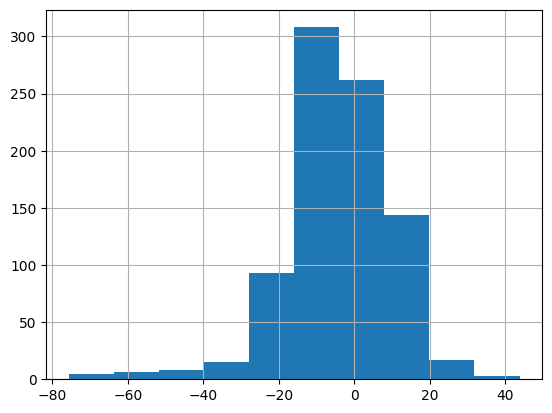

In [1604]:
passes_M["pass_progression"].hist()

In [1605]:
for i in passes_M.columns:
    print(i)

id
player
possession
match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player_id
position
possession_team
p

In [1606]:
player_df

,position,player
0,Left Center Forward,Antoine Griezmann
1,Left Defensive Midfield,Augusto Matías Fernández
2,Left Back,Carles Planas Antolínez
3,Right Defensive Midfield,Daniel Wass
4,Left Center Back,Diego Roberto Godín Leal
5,Right Wing,Fabián Ariel Orellana Valenzuela
6,Right Center Forward,Fernando José Torres Sanz
7,Left Back,Filipe Luís Kasmirski
8,Right Defensive Midfield,Gabriel Fernández Arenas
9,Right Center Back,Hugo Mallo Novegil


In [1607]:
passes_M = passes_M.set_index("pass_recipient").join(player_df.set_index("player"),how="left",rsuffix="_re_most_played").reset_index()
passes_M.columns

passes_M[["player","position","position_most_played","position_abbreviaiton_most_played","pass_recipient",'position_re_most_played',
       'position_abbreviaiton_most_played_re_most_played']]

KeyError: "['position_abbreviaiton_most_played', 'position_abbreviaiton_most_played_re_most_played'] not in index"

In [1544]:
passes_M["player"]

0                Antoine Griezmann
1        Fernando José Torres Sanz
2         Augusto Matías Fernández
3             Saúl Ñíguez Esclapez
4                 Sergi Gómez Solà
                   ...            
1080    Marcelo Alfonso Díaz Rojas
1081             Iago Aspas Juncal
1082             Iago Aspas Juncal
1083    Marcelo Alfonso Díaz Rojas
1084    Jorge Resurrección Merodio
Name: player, Length: 1085, dtype: object

In [1545]:
columns_to_use = [ 
    'type',
    'x',
    'y',
    'pass_end_x',
    'pass_end_y',
    'shot_outcome_shotFromPass',
    'shot_statsbomb_xg_shotFromPass',
    'pass_succes',
    'f3rd_pass',
    'pass_progression',
    'shot_assisted_pass',
    'goal_assisted_pass',
    'cross',
    'box_pass',
]

passes_M[passes_M["player"]=="Antoine Griezmann"][columns_to_use]


,type,x,y,pass_end_x,pass_end_y,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
0,Pass,60.0,40.0,58.2,40.8,NaN,NaN,True,False,1.8,False,False,False,False
7,Pass,101.8,34.8,103.2,43.1,NaN,NaN,True,False,-1.4,False,False,False,False
43,Pass,44.0,14.8,30.0,13.6,NaN,NaN,True,False,14.0,False,False,False,False
60,Pass,59.0,9.9,47.4,6.3,NaN,NaN,True,False,11.6,False,False,False,False
165,Pass,62.6,21.5,59.9,32.3,NaN,NaN,True,False,2.7,False,False,False,False
168,Pass,72.3,10.2,67.5,11.0,NaN,NaN,False,False,NaN,False,False,False,False
171,Pass,68.7,8.7,62.6,4.6,NaN,NaN,True,False,6.1,False,False,False,False
217,Pass,72.3,32.8,64.4,34.3,NaN,NaN,True,False,7.9,False,False,False,False
270,Pass,80.6,6.6,69.4,3.9,NaN,NaN,True,False,11.2,False,False,False,False
283,Pass,77.9,42.1,96.0,21.5,NaN,NaN,False,True,NaN,False,False,False,False


### Foul Data


In [1546]:
foul_commited = events_df[(events_df.type=="Foul Committed")][["id","player","position","team","timestamp","minute","type","foul_committed_advantage","foul_committed_card","x","y"]]

print(foul_commited.shape[0])
foul_commited.tail(10)


33


,id,player,position,team,timestamp,minute,type,foul_committed_advantage,foul_committed_card,x,y
3751,414d0c74-4827-430e-a72a-5ad0db339b67,Augusto Matías Fernández,Left Defensive Midfield,Atlético Madrid,1900-01-01 01:10:22.009,70,Foul Committed,NaN,NaN,62.5,26.3
3752,d261f8de-40bb-45fd-ac91-31c35bfa888e,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:15:35.256,75,Foul Committed,NaN,NaN,81.9,74.0
3753,cb34877c-028a-4d18-bfe2-511b3462dea8,Manuel Agudo Durán,Center Attacking Midfield,Celta Vigo,1900-01-01 01:17:30.263,77,Foul Committed,NaN,NaN,74.9,1.8
3754,9d7336ca-e218-482e-9e99-996a90cd8ed5,Tiago Cardoso Mendes,Right Center Forward,Atlético Madrid,1900-01-01 01:19:00.928,79,Foul Committed,NaN,NaN,76.2,66.1
3755,b2d7cca3-8a55-45b6-833d-d9c1e6d87a4e,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:19:53.217,79,Foul Committed,NaN,Yellow Card,20.6,72.9
3756,3790a9dd-67a0-48b5-8706-20845a9dae0d,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:22:27.987,82,Foul Committed,NaN,NaN,100.9,15.1
3757,269d0864-6dfb-4015-86d6-e2d6aeab7b4e,Iago Aspas Juncal,Right Wing,Celta Vigo,1900-01-01 01:23:07.546,83,Foul Committed,NaN,NaN,110.4,7.2
3758,5dc42404-b3c9-4518-b6b0-45dce7d51672,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:24:49.125,84,Foul Committed,NaN,NaN,86.5,72.3
3759,33dadcbf-3929-48d9-a644-27ab3bc67f33,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:28:49.055,88,Foul Committed,NaN,NaN,7.3,7.7
3760,3b363bc1-dbec-4e43-96d8-7d1abdd0b44b,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:31:32.187,91,Foul Committed,NaN,NaN,32.3,73.3


In [1547]:
fouls = events_df[(events_df["type"]=="Foul Won")]
print(fouls.shape[0])
fouls[["player","team","timestamp","minute","type","id","related_events"]].tail(5)

33


,player,team,timestamp,minute,type,id,related_events
3789,Jonathan Castro Otto,Celta Vigo,1900-01-01 01:22:27.987,82,Foul Won,68fa02f3-dbf9-43d6-b649-aa34a8badce2,[3790a9dd-67a0-48b5-8706-20845a9dae0d]
3790,Jorge Resurrección Merodio,Atlético Madrid,1900-01-01 01:23:07.546,83,Foul Won,5db7d66b-ca93-43f4-ba32-de6f8eddbc4c,"[269d0864-6dfb-4015-86d6-e2d6aeab7b4e, 55ef274..."
3791,Nemanja Radoja,Celta Vigo,1900-01-01 01:24:49.125,84,Foul Won,d0db5cad-c4f4-4fe2-baad-2744b62081a0,[5dc42404-b3c9-4518-b6b0-45dce7d51672]
3792,Diego Roberto Godín Leal,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,c007809b-149f-40a1-8d32-a42091f4dc18,"[33dadcbf-3929-48d9-a644-27ab3bc67f33, 3fd6206..."
3793,Théo Bongonda Mbul''Ofeko Batombo,Celta Vigo,1900-01-01 01:31:32.187,91,Foul Won,4e653a83-fed2-45ab-8820-1c67976294ef,[3b363bc1-dbec-4e43-96d8-7d1abdd0b44b]


In [1548]:
events_df = events_df[~((events_df["type"]=="Foul Won") | (events_df["type"]=="Foul Committed"))]


In [1549]:
fouls = fouls.explode("related_events")
fouls["related_events"].tail(5)

3790    55ef2742-bf41-4c80-a14f-57e0cf6b7405
3791    5dc42404-b3c9-4518-b6b0-45dce7d51672
3792    33dadcbf-3929-48d9-a644-27ab3bc67f33
3792    3fd6206b-0c97-4afd-af87-f71e438f4528
3793    3b363bc1-dbec-4e43-96d8-7d1abdd0b44b
Name: related_events, dtype: object

In [1550]:
fouls_M = fouls.set_index("related_events").join(foul_commited.set_index("id"),how="left", rsuffix='_foul_commitedJ').reset_index()
fouls_M.head(5)

,related_events,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,...,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
0,a6efbf28-5c40-4ca3-bd4b-7b85e745892d,Fernando José Torres Sanz,26,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Sergi Gómez Solà,Left Center Back,Celta Vigo,1900-01-01 00:10:34.036,10.0,Foul Committed,NaN,NaN,50.5,30.4
1,d86f2d8c-7371-4014-a763-79eeff51e457,Daniel Wass,31,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 00:13:56.463,13.0,Foul Committed,NaN,NaN,56.7,21.2
2,5069b75a-78e4-43eb-b0f6-3871d85bb63e,Daniel Wass,41,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 00:17:27.164,17.0,Foul Committed,NaN,NaN,74.6,29.1
3,9197df70-8034-424b-9aeb-c452f6ed9422,Antoine Griezmann,47,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Marcelo Alfonso Díaz Rojas,Left Defensive Midfield,Celta Vigo,1900-01-01 00:19:50.549,19.0,Foul Committed,NaN,NaN,39.9,67.3
4,a54a1a6b-ac94-4702-8f08-144de91fa4fb,Antoine Griezmann,55,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 00:23:07.707,23.0,Foul Committed,NaN,NaN,48.9,53.4


In [1551]:
fouls_M[["player","position","team","timestamp","minute","type","player_foul_commitedJ","team_foul_commitedJ",'timestamp_foul_commitedJ', 'minute_foul_commitedJ',
       'type_foul_commitedJ', 'player_foul_commitedJ',
       'position_foul_commitedJ', 
       'foul_committed_advantage_foul_commitedJ',
       'foul_committed_card_foul_commitedJ', 'x_foul_commitedJ',
       'y_foul_commitedJ']].tail(5)

,player,position,team,timestamp,minute,type,player_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
36,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 01:23:07.546,83,Foul Won,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Nemanja Radoja,Left Defensive Midfield,Celta Vigo,1900-01-01 01:24:49.125,84,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:24:49.125,84.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,86.5,72.3
38,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,Hugo Mallo Novegil,Celta Vigo,1900-01-01 01:28:49.055,88.0,Foul Committed,Hugo Mallo Novegil,Right Center Back,NaN,NaN,7.3,7.7
39,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Théo Bongonda Mbul''Ofeko Batombo,Left Wing,Celta Vigo,1900-01-01 01:31:32.187,91,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:31:32.187,91.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,32.3,73.3


In [1552]:
fouls_M[fouls_M["player_foul_commitedJ"].notna()][["player","position","team","timestamp","minute","type","player_foul_commitedJ","team_foul_commitedJ",'timestamp_foul_commitedJ', 'minute_foul_commitedJ',
       'type_foul_commitedJ', 'player_foul_commitedJ',
       'position_foul_commitedJ', 
       'foul_committed_advantage_foul_commitedJ',
       'foul_committed_card_foul_commitedJ', 'x_foul_commitedJ',
       'y_foul_commitedJ']].tail(5)

,player,position,team,timestamp,minute,type,player_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
34,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 01:22:27.987,82,Foul Won,Saúl Ñíguez Esclapez,Atlético Madrid,1900-01-01 01:22:27.987,82.0,Foul Committed,Saúl Ñíguez Esclapez,Right Midfield,NaN,NaN,100.9,15.1
35,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 01:23:07.546,83,Foul Won,Iago Aspas Juncal,Celta Vigo,1900-01-01 01:23:07.546,83.0,Foul Committed,Iago Aspas Juncal,Right Wing,NaN,NaN,110.4,7.2
37,Nemanja Radoja,Left Defensive Midfield,Celta Vigo,1900-01-01 01:24:49.125,84,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:24:49.125,84.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,86.5,72.3
38,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 01:28:49.055,88,Foul Won,Hugo Mallo Novegil,Celta Vigo,1900-01-01 01:28:49.055,88.0,Foul Committed,Hugo Mallo Novegil,Right Center Back,NaN,NaN,7.3,7.7
40,Théo Bongonda Mbul''Ofeko Batombo,Left Wing,Celta Vigo,1900-01-01 01:31:32.187,91,Foul Won,Gabriel Fernández Arenas,Atlético Madrid,1900-01-01 01:31:32.187,91.0,Foul Committed,Gabriel Fernández Arenas,Right Center Midfield,NaN,NaN,32.3,73.3


In [1553]:
fouls_M = fouls_M[fouls_M["player_foul_commitedJ"].notna()]
fouls_M

,related_events,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,...,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
0,a6efbf28-5c40-4ca3-bd4b-7b85e745892d,Fernando José Torres Sanz,26,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Sergi Gómez Solà,Left Center Back,Celta Vigo,1900-01-01 00:10:34.036,10.0,Foul Committed,NaN,NaN,50.5,30.4
1,d86f2d8c-7371-4014-a763-79eeff51e457,Daniel Wass,31,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Diego Roberto Godín Leal,Left Center Back,Atlético Madrid,1900-01-01 00:13:56.463,13.0,Foul Committed,NaN,NaN,56.7,21.2
2,5069b75a-78e4-43eb-b0f6-3871d85bb63e,Daniel Wass,41,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 00:17:27.164,17.0,Foul Committed,NaN,NaN,74.6,29.1
3,9197df70-8034-424b-9aeb-c452f6ed9422,Antoine Griezmann,47,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Marcelo Alfonso Díaz Rojas,Left Defensive Midfield,Celta Vigo,1900-01-01 00:19:50.549,19.0,Foul Committed,NaN,NaN,39.9,67.3
4,a54a1a6b-ac94-4702-8f08-144de91fa4fb,Antoine Griezmann,55,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Jonathan Castro Otto,Right Back,Celta Vigo,1900-01-01 00:23:07.707,23.0,Foul Committed,NaN,NaN,48.9,53.4
5,97f3beef-4789-49f1-abe2-9fadc947be73,Augusto Matías Fernández,61,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Manuel Agudo Durán,Left Wing,Celta Vigo,1900-01-01 00:25:54.317,25.0,Foul Committed,NaN,NaN,56.6,14.4
6,8c005c0d-a5c5-484e-bd4c-b472b475c1e7,Fabián Ariel Orellana Valenzuela,65,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Jorge Resurrección Merodio,Left Midfield,Atlético Madrid,1900-01-01 00:27:19.498,27.0,Foul Committed,NaN,NaN,86.1,47.1
7,d6506f27-60e4-4c6a-96f0-acc8b2d47972,Manuel Agudo Durán,73,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Juan Francisco Torres Belén,Right Back,Atlético Madrid,1900-01-01 00:29:59.298,29.0,Foul Committed,NaN,NaN,82.7,73.6
8,f941941f-9fa0-4a96-b189-fbca7d94b308,John Guidetti,75,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Stefan Savić,Right Center Back,Atlético Madrid,1900-01-01 00:31:32.860,31.0,Foul Committed,NaN,NaN,48.5,74.0
10,ec125f3a-e118-43da-8b48-bcd322a11558,Jorge Resurrección Merodio,76,3825882,NaN,NaN,NaN,NaN,NaN,NaN,...,Pedro Pablo Hernández,Center Attacking Midfield,Celta Vigo,1900-01-01 00:32:00.234,32.0,Foul Committed,True,NaN,42.6,60.2


In [1554]:
events_df = pd.concat([events_df,passes_M,fouls_M])
events_df

,player,possession,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,timestamp_foul_commitedJ,minute_foul_commitedJ,type_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
0,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,103,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Jonathan Castro Otto,184,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Saúl Ñíguez Esclapez,Right Midfield,Atlético Madrid,1900-01-01 01:22:27.987,82.0,Foul Committed,NaN,NaN,100.9,15.1
35,Jorge Resurrección Merodio,186,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Iago Aspas Juncal,Right Wing,Celta Vigo,1900-01-01 01:23:07.546,83.0,Foul Committed,NaN,NaN,110.4,7.2
37,Nemanja Radoja,188,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gabriel Fernández Arenas,Right Center Midfield,Atlético Madrid,1900-01-01 01:24:49.125,84.0,Foul Committed,NaN,NaN,86.5,72.3
38,Diego Roberto Godín Leal,196,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hugo Mallo Novegil,Right Center Back,Celta Vigo,1900-01-01 01:28:49.055,88.0,Foul Committed,NaN,NaN,7.3,7.7


### **Test for Passing Networks**

In [1555]:
def event_data_creation(events_extra_info,match_ID):
    
    events_df = sb.events(match_id=match_ID)
    events_df = events_df.set_index("match_id").join(events_extra_info.set_index("match_id"),how="left", rsuffix='_match').reset_index()
    events_df.set_index("id")


    events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], format='%H:%M:%S.%f')
    events_df.loc[events_df['minute'] >= 45, 'timestamp'] += pd.Timedelta(minutes=45)
    
    posessions_sorted = events_df[["duration","kick_off","minute","timestamp","possession","possession_team"]].sort_values("timestamp")
    possession_time = posessions_sorted.groupby("possession").apply(
        lambda x: (x["timestamp"].max() - x["timestamp"].min()).total_seconds()
    ).reset_index(name="possession_time")
    events_df = events_df.set_index("possession").join(possession_time.set_index("possession"),how="left").reset_index()

    players = (
        events_df[events_df["player"].notnull()][["player", "position", "team"]]
        .groupby("player")["position"]
        .agg(lambda x: x.value_counts().idxmax())
        .reset_index()
    )
    events_df = events_df.set_index("player").join(players.set_index("player"),how="left",rsuffix="_most_played").reset_index()

    events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
    events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
    passes = events_df[(events_df.type=="Pass")]
    passes = passes[passes["pass_outcome"] != "Injury Clearance"]
    events_df = events_df[((events_df.type=="Pass")&(events_df["pass_outcome"] == "Injury Clearance"))|(events_df.type!="Pass")]
    shots_fromPass = events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]
    passes_M = passes.set_index("id").join(shots_fromPass.set_index("shot_key_pass_id"),how="left",rsuffix='_shotFromPass').reset_index()
    passes_M["pass_succes"] = passes_M.pass_outcome.isna()
    passes_M["f3rd_pass"] = (passes_M.x < 80) & (passes_M.pass_end_x > 80)
    passes_M["pass_progression"] = passes_M["x"] - passes_M["pass_end_x"]
    passes_M["pass_progression"].loc[passes_M.pass_outcome.notna()] = None
    passes_M["shot_assisted_pass"] = passes_M.pass_outcome.isna() &  passes_M["shot_outcome_shotFromPass"].notna()
    passes_M["goal_assisted_pass"] = passes_M.pass_outcome.isna() & passes_M["shot_outcome_shotFromPass"] == "Goal"
    passes_M["cross"] = (passes_M.pass_cross == True)
    passes_M["box_pass"] = (
        (passes_M.x < 102)
        & ((passes_M.y < 18) | (passes_M.y > 62))
        & (passes_M.pass_end_x > 102)
        & ((passes_M.pass_end_y > 18) | (passes_M.pass_end_y < 62))
    )
    passes_M = passes_M.set_index("pass_recipient").join(players.set_index("player"),how="left",rsuffix="_re_most_played").reset_index()

    foul_commited = events_df[(events_df.type=="Foul Committed")][["id","player","position","team","timestamp","minute","type","foul_committed_advantage","foul_committed_card","x","y"]]
    fouls = events_df[(events_df["type"]=="Foul Won")]
    events_df = events_df[~((events_df["type"]=="Foul Won") | (events_df["type"]=="Foul Committed"))]
    fouls = fouls.explode("related_events")
    fouls_M = fouls.set_index("related_events").join(foul_commited.set_index("id"),how="left", rsuffix='_foul_commitedJ').reset_index()
    fouls_M = fouls_M[fouls_M["player_foul_commitedJ"].notna()]

    events_df = pd.concat([events_df,passes_M,fouls_M])

    return events_df


events_df_test = event_data_creation(events_extra_info,3825882)

/Users/emirysaglam/GitHub/Bitirme/.venv/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_24408/2727684300.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  possession_time = posessions_sorted.groupby("possession").apply(
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_24408/2727684300.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in panda

In [ ]:
events_df_test[events_df["type"]=="Pass"][[ 
    'x',
    'y',
    'pass_end_x',
    'pass_end_y',
    "team",
    "player",
    "position",
    "position_most_played",
    "pass_recipient",
    "position_re_most_played",
    "player_shotFromPass",
    'shot_outcome_shotFromPass',
    'shot_statsbomb_xg_shotFromPass',
    'pass_succes',
    'f3rd_pass',
    'pass_progression',
    'shot_assisted_pass',
    'goal_assisted_pass',
    'cross',
    'box_pass',
    "possession"
]].head(10)

,x,y,pass_end_x,pass_end_y,team,player,position,position_most_played,pass_recipient,position_re_most_played,...,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass,possession
0,60.0,40.0,58.2,40.8,Atlético Madrid,Antoine Griezmann,Left Center Forward,Left Center Forward,Fernando José Torres Sanz,Right Center Forward,...,NaN,NaN,True,False,1.8,False,False,False,False,2
1,57.6,39.2,39.2,36.5,Atlético Madrid,Fernando José Torres Sanz,Right Center Forward,Right Center Forward,Augusto Matías Fernández,Left Defensive Midfield,...,NaN,NaN,True,False,18.4,False,False,False,False,2
2,44.0,40.0,86.5,12.5,Atlético Madrid,Augusto Matías Fernández,Left Defensive Midfield,Left Defensive Midfield,Saúl Ñíguez Esclapez,Right Midfield,...,NaN,NaN,True,True,-42.5,False,False,False,False,2
3,86.5,12.5,101.4,35.2,Atlético Madrid,Saúl Ñíguez Esclapez,Right Midfield,Right Midfield,Antoine Griezmann,Left Center Forward,...,NaN,NaN,False,False,NaN,False,False,False,False,2
4,18.7,44.9,41.2,29.6,Celta Vigo,Sergi Gómez Solà,Left Center Back,Left Center Back,NaN,NaN,...,NaN,NaN,False,False,NaN,False,False,False,False,2
5,78.5,48.7,92.7,64.6,Atlético Madrid,Augusto Matías Fernández,Left Defensive Midfield,Left Defensive Midfield,Juan Francisco Torres Belén,Right Back,...,NaN,NaN,True,True,-14.2,False,False,False,False,2
6,97.5,64.6,103.2,36.5,Atlético Madrid,Juan Francisco Torres Belén,Right Back,Right Back,Antoine Griezmann,Left Center Forward,...,NaN,NaN,True,False,-5.7,False,False,True,True,2
7,101.8,34.8,103.2,43.1,Atlético Madrid,Antoine Griezmann,Left Center Forward,Left Center Forward,Saúl Ñíguez Esclapez,Right Midfield,...,NaN,NaN,True,False,-1.4,False,False,False,False,2
8,82.0,80.0,73.9,69.5,Atlético Madrid,Juan Francisco Torres Belén,Right Back,Right Back,Gabriel Fernández Arenas,Right Defensive Midfield,...,NaN,NaN,True,False,8.1,False,False,False,False,3
9,78.3,77.0,95.3,74.3,Atlético Madrid,Gabriel Fernández Arenas,Right Defensive Midfield,Right Defensive Midfield,Saúl Ñíguez Esclapez,Right Midfield,...,NaN,NaN,False,True,NaN,False,False,False,False,3


In [1610]:
# Get column names as sets
events_df_col = set(events_df.columns)
events_df_test_col = set(events_df_test.columns)

# Determine differences
only_in_events_df = events_df_col - events_df_test_col  # Columns in df1 but not in df2
only_in_events_df_test_col = events_df_test_col - events_df_col  # Columns in df2 but not in df1

print("Columns only in events_df:", only_in_events_df)
print("Columns only in events_df_test:", only_in_events_df_test_col)


Columns only in events_df: set()
Columns only in events_df_test: {'pass_progression', 'type_foul_commitedJ', 'goal_assisted_pass', 'position_foul_commitedJ', 'cross', 'player_foul_commitedJ', 'team_foul_commitedJ', 'timestamp_foul_commitedJ', 'shot_assisted_pass', 'f3rd_pass', 'shot_statsbomb_xg_shotFromPass', 'position_re_most_played', 'player_shotFromPass', 'foul_committed_advantage_foul_commitedJ', 'y_foul_commitedJ', 'shot_type_shotFromPass', 'box_pass', 'foul_committed_card_foul_commitedJ', 'minute_foul_commitedJ', 'shot_outcome_shotFromPass', 'x_foul_commitedJ', 'pass_succes'}


In [1608]:
ne = (events_df != events_df_test).any(1)
ne

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [1502]:
import pandas as pd
import numpy as np

# Filtreleme ve sıralama
df_network = events_df[events_df["type"]=="Pass"].copy()  # Create a copy to avoid SettingWithCopyWarning
# df = df.sort_values(by='timestamp').reset_index(drop=True)

#df_network = df_network.sort_values(by='timestamp').reset_index(drop=True)



# Sekans ID ve türleri için listeler
sequence_id = []
in_sequence_id = []
sequence_type = []  # Sekans türleri: 'Goal', 'Shot', 'NoShot'
pass_recipient_positions = []

latest_positions = {}

current_sequence_id = 0
current_in_sequence_id = 0
previous_player_to = None  # Bir önceki pası alan oyuncu

for i, row in df_network.iterrows():
    # Yeni bir sekans başlatma kriterleri
    
    if (row['player'] != previous_player_to) :
        # Eğer önceki satırda şut sonucu varsa sekans türünü belirle
        if i > 0:
            previous_row = df_network.iloc[i - 1]
            if previous_row.get('shot_outcome_shotFromPass') == 'Goal':
                sequence_type[-1] = 'Goal'
            elif  pd.notna(previous_row['player_shotFromPass']):
                sequence_type[-1] = 'Shot'
            else:
                sequence_type[-1] = 'NoShot'

        # Yeni bir sekans başlat
        current_sequence_id += 1
        current_in_sequence_id = 0

    current_in_sequence_id+=1
    # Sekans ID'sini ve geçici türü kaydet
    sequence_id.append(current_sequence_id)
    in_sequence_id.append(current_in_sequence_id)
    sequence_type.append('')  # Tür daha sonra doldurulacak

    # Bir sonraki kontrol için 'pass_recipient' değerini güncelle
    previous_player_to = row['pass_recipient']

    #
    latest_positions.update({row['player']:row['position']})
    recipient = row['pass_recipient']
    pass_recipient_positions.append(latest_positions.get(recipient, None))
    

# Son sekansı kontrol et
last_row = df_network.iloc[-1]
if last_row.get('shot_outcome_shotFromPass') == 'goal':
    sequence_type[-1] = 'Goal'
elif pd.notna(previous_row['player_shotFromPass']):
    sequence_type[-1] = 'Shot'
else:
    sequence_type[-1] = 'NoShot'

# Sekans türlerini tüm satırlara yayma
df_network['pass_recipient_position'] = pass_recipient_positions

df_network['SequenceID'] = sequence_id
df_network['InSequenceID'] = in_sequence_id
df_network['SequenceType'] = sequence_type
df_network['SequenceType'] = df_network.groupby('SequenceID')['SequenceType'].transform('last')
df_network['time_past'] = df_network.groupby('SequenceID')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds())

# Create a dictionary to keep track of the latest position of each player


# İlgili sütunları gösterme
result = df_network[["id","minute", "timestamp", "player", "position","pass_recipient","pass_recipient_position","position_re_most_played","position_most_played", "pass_succes",
             "related_events", "player_shotFromPass", "SequenceID","InSequenceID","time_past", "SequenceType"]].head(20)

result

,id,minute,timestamp,player,position,pass_recipient,pass_recipient_position,position_re_most_played,position_most_played,pass_succes,related_events,player_shotFromPass,SequenceID,InSequenceID,time_past,SequenceType
0,a347f358-89cb-4b39-8388-2c7225960978,0,1900-01-01 00:00:00.635,Antoine Griezmann,Left Center Forward,Fernando José Torres Sanz,None,Right Center Forward,Left Center Forward,True,[2ab3f0be-6e9b-4624-a330-5136e003376d],NaN,1,1,0.000,NoShot
1,55330ba9-7a95-4e27-87bc-f60218723e4a,0,1900-01-01 00:00:01.216,Fernando José Torres Sanz,Right Center Forward,Augusto Matías Fernández,None,Left Defensive Midfield,Right Center Forward,True,[1e3d2cec-6b64-4e48-8f50-caabeebbb4cb],NaN,1,2,0.581,NoShot
2,88ed898a-f31d-460e-a161-4234082b379a,0,1900-01-01 00:00:03.963,Augusto Matías Fernández,Left Defensive Midfield,Saúl Ñíguez Esclapez,None,Right Midfield,Left Defensive Midfield,True,[bb8a76dd-0e1f-4ee6-a16f-4530b768ff39],NaN,1,3,3.328,NoShot
3,3b0e9f94-b90b-484d-941a-608560bab675,0,1900-01-01 00:00:06.698,Saúl Ñíguez Esclapez,Right Midfield,Antoine Griezmann,Left Center Forward,Left Center Forward,Right Midfield,False,"[11b5708b-c631-4f25-b7a5-7695004fbc25, f337944...",NaN,1,4,6.063,NoShot
4,f337944f-b786-4133-b0bf-438f9ca2d908,0,1900-01-01 00:00:08.072,Sergi Gómez Solà,Left Center Back,NaN,None,NaN,Left Center Back,False,"[3b0e9f94-b90b-484d-941a-608560bab675, 64b0af5...",NaN,2,1,0.000,NoShot
5,ff100cc3-67fc-4f84-af2f-0502fb235ea5,0,1900-01-01 00:00:13.362,Augusto Matías Fernández,Left Defensive Midfield,Juan Francisco Torres Belén,None,Right Back,Left Defensive Midfield,True,[81008d8a-1cb0-429a-b740-3decc816898f],NaN,3,1,0.000,NoShot
6,66182bc6-b546-4901-94a1-9c0016105cc6,0,1900-01-01 00:00:15.594,Juan Francisco Torres Belén,Right Back,Antoine Griezmann,Left Center Forward,Left Center Forward,Right Back,True,[0ca15c47-b3e2-4529-89d6-2fa479be99dc],NaN,3,2,2.232,NoShot
7,65a13107-119c-45a7-8705-4122eba819f0,0,1900-01-01 00:00:17.032,Antoine Griezmann,Left Center Forward,Saúl Ñíguez Esclapez,Right Midfield,Right Midfield,Left Center Forward,True,[1c979506-7399-432e-89ab-fbb0f7db15ec],NaN,3,3,3.670,NoShot
8,3ffe3aab-67e0-4418-b37c-ac7ec963e108,0,1900-01-01 00:00:24.374,Juan Francisco Torres Belén,Right Back,Gabriel Fernández Arenas,None,Right Defensive Midfield,Right Back,True,[8bd2637b-cd03-44b4-95e4-980adf8cf202],NaN,4,1,0.000,NoShot
9,0bfd5b3c-d482-4d62-a228-86484c084c25,0,1900-01-01 00:00:29.367,Gabriel Fernández Arenas,Right Defensive Midfield,Saúl Ñíguez Esclapez,Right Midfield,Right Midfield,Right Defensive Midfield,False,"[ce6769d9-fd44-46d8-b417-ccfdeaef848e, d78f1a2...",NaN,4,2,4.993,NoShot


In [1503]:
df_network["position_re_most_played"]

0          Right Center Forward
1       Left Defensive Midfield
2                Right Midfield
3           Left Center Forward
4                           NaN
                 ...           
1080                 Right Wing
1081                        NaN
1082    Left Defensive Midfield
1083                  Left Wing
1084             Center Forward
Name: position_re_most_played, Length: 1085, dtype: object

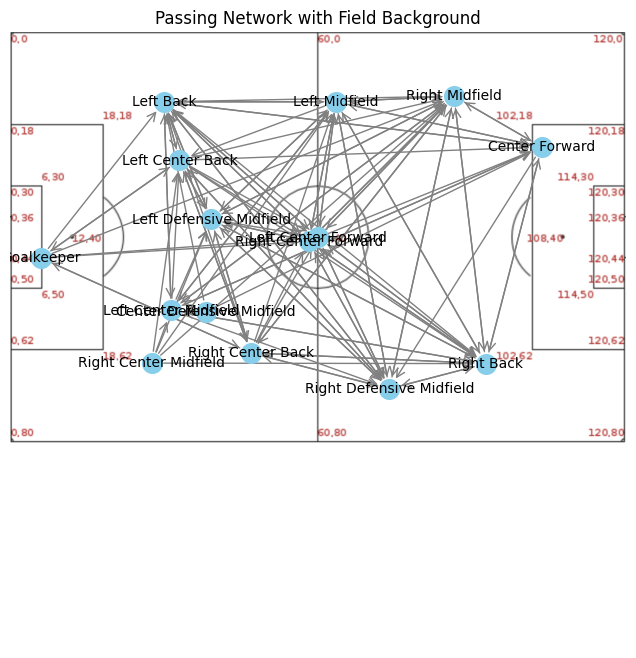

In [1505]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



df = df_network[df_network["team"]=="Atlético Madrid"]

# Sadece başarılı pasları ve geçerli 'pass_recipient' olan satırları kullan
df = df[pd.notna(df['position']) & (pd.notna(df['position_re_most_played']))]

# NetworkX grafiği oluştur
G = nx.DiGraph()  # Yönlü grafik
for _, row in df.iterrows():
    G.add_edge(row['position'], row['position_re_most_played'], weight=1)

# Ağırlıkları kenar kalınlığına dönüştür
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Oyuncu konumları
positions = {}
for _, row in df.iterrows():
    # Oyuncu konumlarını ekle
    if row['position'] not in positions:
        positions[row['position']] = (row['x'], row['y'])
    if row['position_re_most_played'] not in positions:
        positions[row['position_re_most_played']] = (row['pass_end_x'], row['pass_end_y'])

# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 8))
  
# Arka plan görseli ekleme
field_image = plt.imread("pitch.png")  # Futbol sahası görselinin yolu
ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Koordinatları ayarla

# Ağ çizimi
nx.draw_networkx_nodes(G, positions, node_size=200, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax)

# Eksen ayarları
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_axis_off()  # Eksenleri gizle
ax.invert_yaxis()

plt.title("Passing Network with Field Background")
plt.show()

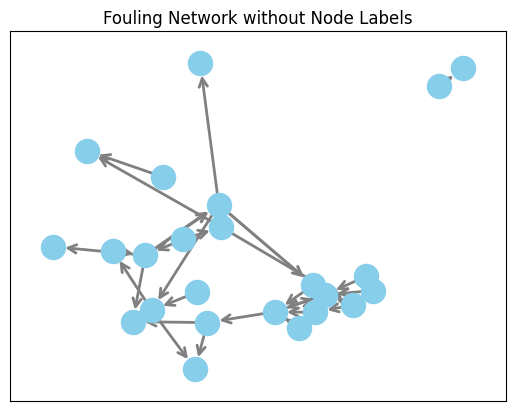

In [1376]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = events_df[events_df["type"]=="Foul Won"].copy()   # Create a copy to avoid SettingWithCopyWarning

# Create the NetworkX graph
G = nx.DiGraph()  # Directed graph
for _, row in df.iterrows():
    if G.has_edge(row['player'], row['player_foul_commitedJ']):
        G[row['player']][row['player_foul_commitedJ']]['weight'] += 0.1  # Increment weight if edge already exists
    else:
        G.add_edge(row['player'], row['player_foul_commitedJ'], weight=1)  # Initialize weight as 1

# Get edge weights for visualization (scaled for thickness)
edges = G.edges(data=True)
weights = [2 * edge[2]['weight'] for edge in edges]  # Scale weights (e.g., multiply by 2)

# Use a NetworkX layout for node positioning
positions = nx.spring_layout(G)  # Automatically position nodes using the spring layout


# Draw nodes and edges
nx.draw_networkx_nodes(G, positions, node_size=300, node_color="skyblue")
# Removed the node label drawing
# nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(
    G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15
)



plt.title("Fouling Network without Node Labels")
plt.show()
